# Multiclass Classification 

One way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called
the one-versus-the-rest (OvR) strategy (also called one-versus-all).

Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. 

If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. 

**The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish**.


Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set. For these algorithms OvO is preferred because it is faster to train many classifiers on small training sets than to train few classifiers on large training sets. **For most binary classification
algorithms, however, OvR is preferred.**


In [1]:
%xmode Plain

Exception reporting mode: Plain


In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,precision_recall_curve,precision_score,recall_score,f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict,cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import joblib
import warnings
warnings.filterwarnings("ignore")

In [18]:
dataset = pd.read_csv('mnist_dataset.csv', index_col=0)
dataset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [17]:
X = dataset.iloc[:,:784]
y = dataset['class']
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000],y[60000:]

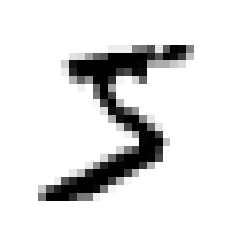

In [6]:
some_digit = X.iloc[0].to_numpy() 
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [7]:
#%%time
#svm_clf = SVC()
#svm_clf.fit(X_train, y_train)

In [8]:
#svm_clf.predict([some_digit])

In [9]:
#joblib.dump(svm_clf," svm_clf.pkl")

If you want to force Scikit-Learn to use one-versus-one or one-versus-therest, you can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a classifier to its constructor (it does not even have to be a binary classifier). For example, this code creates a multiclass classifier using the OvR strategy, based on an SVC

In [10]:
#%%time
#from sklearn.multiclass import OneVsRestClassifier
#ovr_clf = OneVsRestClassifier(SVC())
#ovr_clf.fit(X_train, y_train)

In [11]:
#joblib.dump(ovr_clf,'ovr_clf.pkl')

In [12]:
#ovr_clf.predict([some_digit])

In [13]:
ovr_clf = joblib.load('ovr_clf.pkl')
len(ovr_clf.estimators_)

10

SGD classifiers can directly classify instances into multiple classes.

In [21]:
#%%time
#sgd_clf = SGDClassifier(random_state=42)
#sgd_clf.fit(X_train, y_train)
#joblib.dump(sgd_clf,'sgd_clf.pkl')

In [20]:
sgd_clf = joblib.load('sgd_clf.pkl')
sgd_clf.predict([some_digit])

array([3], dtype=int64)

In [32]:
dcf = sgd_clf.decision_function([some_digit])
dcf

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [33]:
classes = sgd_clf.classes_
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [37]:
l = list(zip(classes, *dcf))
l

[(0, -31893.030954190523),
 (1, -34419.690696322774),
 (2, -9530.639507393267),
 (3, 1823.7315403079085),
 (4, -22320.14822877826),
 (5, -1385.8047889456282),
 (6, -26188.910709508506),
 (7, -16147.513239972779),
 (8, -4604.354912743626),
 (9, -12050.767298003786)]

In [27]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled, y_train, cv=3, scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

# Error Analysis
## Confusion Matrix

In [39]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

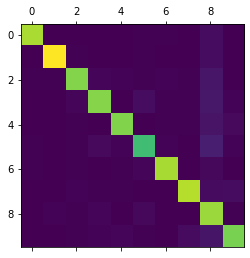

In [42]:
#Display an array as a matrix in a new figure window.
plt.matshow(conf_mx)
plt.show()

This confusion matrix looks pretty good, since most images are on the main diagonal, which means that they were classified correctly. The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on
5s as on other digits. In fact, you can verify that both are the case.


In [107]:
vc = y_train.value_counts(normalize=True)
l = [vc.index, vc*100]
l

[Int64Index([1, 7, 3, 2, 9, 0, 6, 8, 4, 5], dtype='int64'),
 1    11.236667
 7    10.441667
 3    10.218333
 2     9.930000
 9     9.915000
 0     9.871667
 6     9.863333
 8     9.751667
 4     9.736667
 5     9.035000
 Name: class, dtype: float64]

<BarContainer object of 10 artists>

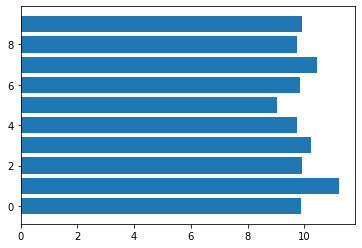

In [105]:
plt.barh(l[0], l[1])

## Analysing Error Rates

Divide each value in the confusion matrix by the number of images in the corresponding **class** (observed not predicted) so that you can compare error rates instead of absolute numbers of errors (which would make abundant classes look unfairly bad)

In [116]:
#keepdims : bool, optional
#If this is set to True, the axes which are reduced are left
#in the result as *dimensions* with size one. With this option,
#the result will broadcast correctly against the input array.

row_sums = conf_mx.sum(axis=1, keepdims=True)# otherwise (10,)
print(conf_mx.shape,row_sums.shape)

(10, 10) (10, 1)


In [129]:
#normalized confusion matrix
#divide each column element by the column total
# 5578/5923, 0/5923, 22/5923, 7/5923, 8/5923 etc
# 0/6742, 6410/6742, 35/6742, 26/6742, 4/6742 etc
norm_conf_mx = conf_mx / row_sums
norm_conf_mx[:3]

array([[9.41583657e-01, 0.00000000e+00, 3.71433395e-03, 8.44166807e-04,
        1.35066689e-03, 7.25983454e-03, 6.07800101e-03, 1.01300017e-03,
        3.79875063e-02, 1.68833361e-04],
       [0.00000000e+00, 9.49273213e-01, 5.48798576e-03, 3.55977455e-03,
        5.93295758e-04, 6.52625334e-03, 5.93295758e-04, 1.03826758e-03,
        3.14446752e-02, 1.48323939e-03],
       [4.53172205e-03, 4.53172205e-03, 8.76132931e-01, 1.54414233e-02,
        1.22524337e-02, 4.53172205e-03, 1.12453844e-02, 6.04229607e-03,
        6.34441088e-02, 1.84625713e-03]])

In [132]:
#since diagonal values represent correctly classified classes
#fill the diagonal with zeros to keep only the errors, and plot the result:
#if this is not done it will look exactly like the matshow above

np.fill_diagonal(norm_conf_mx, 0)

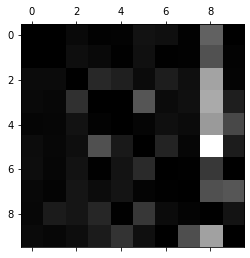

In [133]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Because the column for class 8 is bright, we know that many images get misclassified as 8.

However, the row for class 8 is not as bright which means in general 8s get properly classified

We can see 5 and 3s get confused with each other often

# Possible Solutions

Looking at this plot, it seems that your efforts
should be spent on reducing the false 8s. 

>For example, you could try to gather more training data for digits that look like 8s (but are not) so that the classifier can learn to distinguish them from real 8s.

>Or you could engineer new features that would help the classifier—for example, writing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5
has none). 

>Or you could preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make some patterns, such as closed loops, stand out more.


The main difference between 3s and 5s is the position of the small line that joins the top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left, the classifier might classify it as a 5, and vice versa. 

In other words, this classifier is quite sensitive to image shifting and rotationSo one way to reduce the 3/5 confusion would be to preprocess the
images to ensure that they are well centered and not too rotated. This will probably help reduce other errors as well.